In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
data_paths_list = [
    "/home/alexander/Projects/LANLEarthquakePrediction/data/raw/test/seg_0bb5fd.csv",
    "/home/alexander/Projects/LANLEarthquakePrediction/data/raw/test/seg_0c74cf.csv",
    "/home/alexander/Projects/LANLEarthquakePrediction/data/raw/test/seg_0e3739.csv",
    "/home/alexander/Projects/LANLEarthquakePrediction/data/raw/test/seg_0fd3ff.csv",
    "/home/alexander/Projects/LANLEarthquakePrediction/data/raw/test/seg_1d044c.csv",
    "/home/alexander/Projects/LANLEarthquakePrediction/data/raw/test/seg_1ebe6b.csv"
]
data_list = list(map(lambda x: pd.read_csv(x).values, data_paths_list))

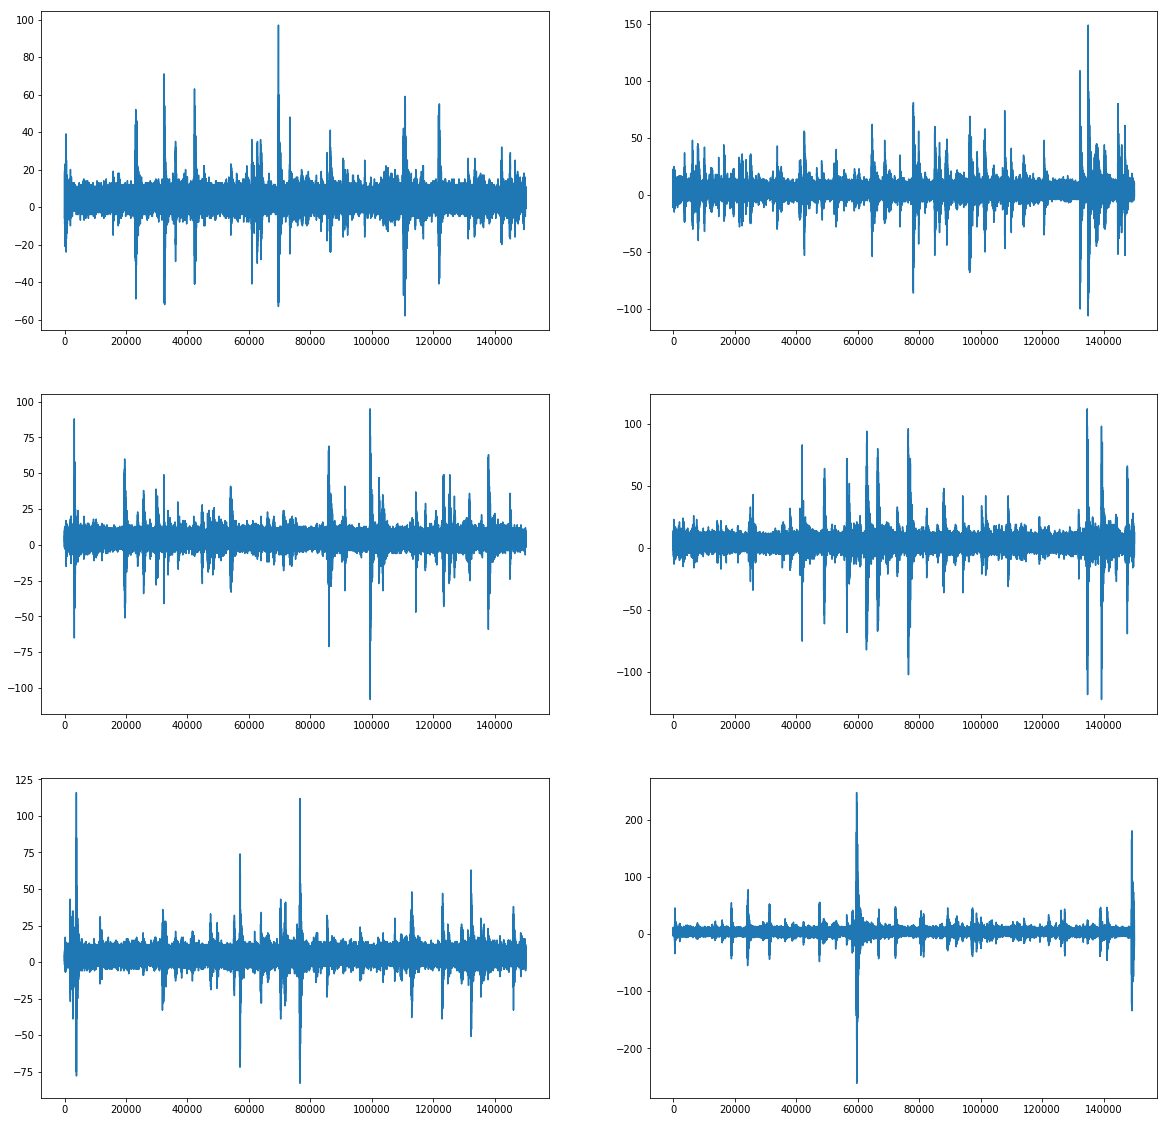

In [26]:
plt.figure(figsize=(20,20))
for i in range(6):
    plt.subplot(3, 2, i+1)
    plt.plot(data_list[i])
plt.show()

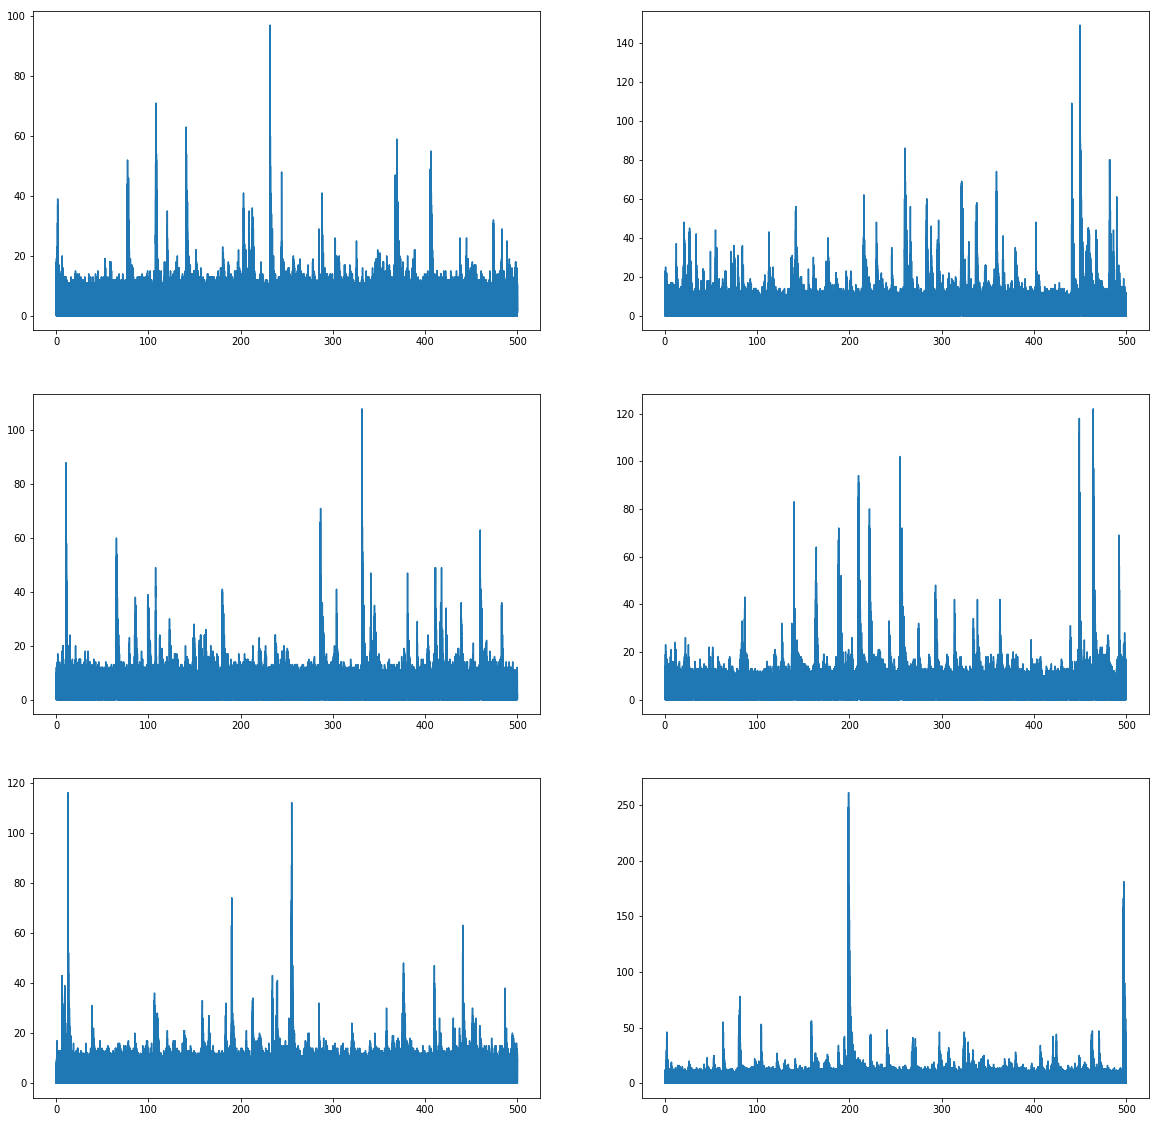

In [48]:
fourie_list = []

for d in data_list:
    amp = np.abs(np.fft.rfft(d))
    freq = np.fft.rfftfreq(300000-1, 1/1000)
    fourie_list.append({'amp': amp, 'freq': freq})

plt.figure(figsize=(20,20))
for i in range(6):
    plt.subplot(3, 2, i+1)
    plt.plot(fourie_list[i]['freq'], fourie_list[i]['amp'])
plt.show()

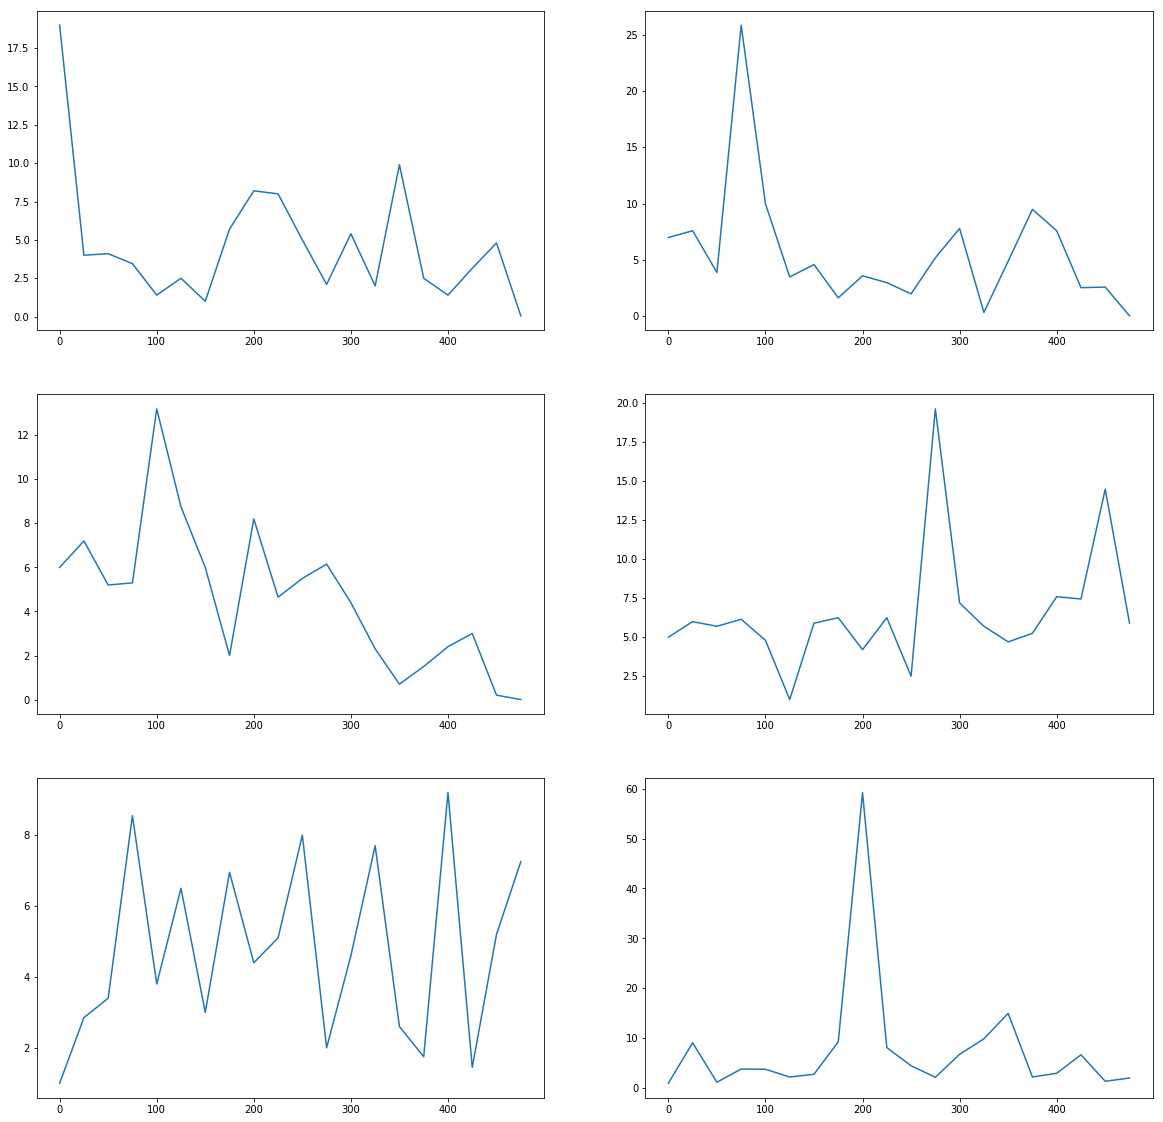

In [58]:
from scipy import interpolate

n = 20

plt.figure(figsize=(20,20))
for i, fourie_dict in enumerate(fourie_list):
    amp = fourie_dict['amp'][:, 0]
    freq = fourie_dict['freq']
    func = interpolate.interp1d(freq, amp)
    freq = np.arange(0, max(freq), max(freq) / n)
    amp = func(freq)
    plt.subplot(3, 2, i+1)
    plt.plot(freq, amp)
plt.show()